# An Analysis of The Global Light Pollution Standards

**Prannaya Gupta (M21404)**

## Table of Contents

## Introduction
A side-effect of technological advancement has been the amount of light pollution in the world today. Ever since Thomas Edison’s revolutionary invention of the light bulb, the world has been thrust into a landscape of light-afflicted skies. According to various studies, around 80% of people live under light pollution-afflicted skies every day, and whilst this may not affect the day-to-day life of an individual, astronomers are very much affected by the sudden illumination in the skies. Even the Singaporean sky is very much damaged by light pollution, with 99.5% of all stars being completely invisible without optical aid<sup>[22]</sup>.


## Research Questions

### A.	What are locations of minimal light pollution intensity which are optimum for astronomical observation?

While one might think that the best locations are in the middle of wilderness or large water bodies (i.e. the ocean), these locations need to be filtered based on accessibility, especially since locations like the middle of the ocean are not feasible locations for people to assemble to watch and will thus not be a great location for astrophotography.

In order to map this, I can use the absolute night-time light datasets<sup>[4-7]</sup> to analyse locations of minimal light intensity. In order to do the filtering of data, I can use the Base Map<sup>[8]</sup> and Matplotlib’s BaseMap Library<sup>[26]</sup>. This can give us a few optimum points best for this type of analysis.


### B.	How has the light pollution data around the world changed? Which countries are most susceptible to high light pollution in the future? Which countries are lessening in terms of light pollution?

There are many countries that have had rampant increases in Light Pollution over the past few years, while others have made an effort to reduce their already increased Light Pollution. We need to map the data in order to find out which countries are susceptible to the level of problematic light pollution that can be found in cities like Singapore.

Due to the possession of the Time Series Data of night-time light pollution data<sup>[1-3]</sup>, we can easily map locations based on relative changes in absolute light magnitude. I intend to use the geolocation datasets<sup>[9-12]</sup> against the time-series night-time light datasets<sup>[1,17]</sup> to find changes and from there and map it using a possible regression model so as to predict the curve of increase/decrease. This can be used to make predictions and compare to other light pollution levels.


### C. What are the impacts of Light Pollution on the Biodiversity around the area?

High Light Pollution can have a detrimental impact on animals’ survival, hence they are likely to be found in areas with lesser light pollution, which can be adopted as a hypothesis. Another investigation could be what types of animals can be found closer to Light pollution related areas. For example, Moths should ideally be found in high light pollution, but endangered species will likely not be found in similar areas.

Based on the eBird Observation Dataset<sup>[13]</sup>, we can find relative values symbolising the animals’ survival patterns and frequency of observations, thereby relating it to Time Series Night-time Light Data so as to procure information regarding how the birds have moved about in the presence of light pollution. The International Barcode of Life dataset<sup>[14]</sup> is also a logical dataset to not only map frequency patterns but also classify the observations based on existing models and thus finding frequencies of these animals based on Time Series Light Pollution.


### D.	What are the effects and relevance of different types of light facilities on light pollution in the area

One of the factors claimed culpable for the increased light pollution in Singapore is the extreme number of street lights and traffic lights. Hence, I wish to investigate how the frequency of these lights affect the light pollution around the area. I also want to find possible weights to see how relevant these frequencies are.

With the presence of the Light Facilities Datasets<sup>[15-19]</sup>, we can map this on the Absolute Positional Brightness Dataset<sup>[4-7]</sup> so that we can investigate how it’s affects the actual brightness, whilst we can also investigate how it changes with respect to time by using the Time Series night-light data<sup>[1-3]</sup> and the time based datasets<sup>[15,19]</sup>. This can then be used to compute possible patterns and predictions regarding where the Singapore light pollution may lead up to. To consider Singapore alone, I will be using Geopy<sup>[25]</sup> for the most part and filtering coordinates based on available geographical information.


### E.	What is the relation between the average energy consumption and general demographics in each area (eg Tampines, Jurong etc) and the Light Pollution?

A reason for considering this is the lack of mathematical analysis as to how energy consumption in specific districts affect the light pollution there. General mathematics regarding data in Singapore itself hasn’t been explored, hence using this is a good way of exploring something new. We can model the types of houses, general types of people living there, and the energy consumption based on that and from there, we can test how it affects nearby light pollution.

I intend to use the Economical Datasets that give data regarding the Singapore Energy Consumption statistics<sup>[20]</sup> and the Singapore Resident demographics<sup>[21]</sup>. The usage of the Absolute positional brightness datasets<sup>[4-7]</sup>, filtering Singapore similarly to the previous research question. This can therefore be using in conjunction to find possible patterns.

## Set-Up and Imports

In [1]:
%load_ext autoreload
%autoreload 2
# to ensure kernel resets when files change around it

In [2]:
!pip install np ipympl opendatasets h5py imagecodecs tf-explain altair

from IPython.display import clear_output
clear_output()

  Using cached tf_explain-0.3.0-py3-none-any.whl (43 kB)
  Using cached widgetsnbextension-3.5.1-py2.py3-none-any.whl (2.2 MB)
  Using cached kaggle-1.5.12-py3-none-any.whl
  Using cached python_slugify-5.0.2-py2.py3-none-any.whl (6.7 kB)
  Using cached text_unidecode-1.3-py2.py3-none-any.whl (78 kB)


In [3]:
import random, time, math, datetime, os, re
from glob import glob
from pprint import pprint

import warnings
warnings.filterwarnings("ignore")

import np, numpy
import pandas as pd
from lxml import objectify, etree, html
from io import StringIO, BytesIO

import scipy as sp
from scipy import stats
from scipy import special

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()
plt.rcParams["figure.figsize"] = (16.0, 8.0)

from bs4 import BeautifulSoup
import requests

import cv2
from skimage.color import rgb2gray, gray2rgb
from skimage import filters
from skimage.transform import rescale, resize, downscale_local_mean, swirl
from skimage.filters import threshold_otsu, threshold_local, try_all_threshold
import skimage.io as skio
from PIL import ImageOps
import PIL

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LinearRegression


In [4]:
def gamma(n): return np.arange(1 - (n % 1), n).prod() * np.pi ** (n % 1)
def beta(x, y): return gamma(x)*gamma(y)/gamma(x+y)


def I(x, a, b):
    if gamma(a) == np.inf or gamma(b) == np.inf or gamma(a+b) == 0:
        return 0
    if x == 0 or x == 1:
        return x
    if b == 1:
        return x ** a
    if a == 1:
        return 1 - (1-x)**b
    if b > 1:
        return I(x, a, b-1) + (x**a * (1-x)**(b-1))/((b-1)*beta(a, b-1))
    if a > 1:
        return I(x, a-1, b) - (x**(a-1) * (1-x)**b)/((a-1)*beta(a-1, b))
    return ((-1)**a) * I(x/(x-1), a, 1-a-b) * beta(a, 1-a-b)


def pearsonr(x, y):
    x, y = np.array(x - x.mean(axis=0),
                    dtype=object), np.array(y - y.mean(axis=0), dtype=object)
    r = (x.T @ y).sum(axis=0) / \
        np.sqrt(((x**2).sum(axis=0) * (y**2).sum(axis=0)))
    p_val = 2 * np.vectorize(lambda r: 2*I((1-abs(r))/2,
                             x.shape[0]/2-1, x.shape[0]/2-1))(r)
    return np.stack((r, p_val), axis=len(r.shape))


In [12]:
class Resize:
    def __init__(self, img):
        self.img = img

    def __call__(self, func):
        return self.img.apply(lambda img: resize(img, func(img.shape)), "Resized Version of "+self.img.name)

    # def local_mean(self, output_shape):
    #     return self.img.apply(lambda img: resize_local_mean(img, output_shape), self.img.name+" resized by local mean "+str(output_shape))


class Plot:
    def __init__(self, img):
        self.img = img

    def __call__(self):
        self.img.show()

    def contour(self, ax=None, title=""):
        self.img.contourplot(ax=ax, title=title)

    def imageReport(self):
        self.img.createImageReport()


class Image:
    def __init__(self, img: np.ndarray, name: str, path: str = ""):
        if name == "":
            name = path.split("/")[-1].split(".")[0]

        self.name = name
        self.title = "Image of " + name
        self.path = path
        self.img = img
        self.isGray = len(self.img.shape) == 2
        self.resize = Resize(self)
        self.plot = Plot(self)

    @classmethod
    def open(cls, path: str, name: str = ""):
        return cls(skio.imread(path), name=name, path=path)
    
    @classmethod
    def read(cls, path:str, name:str = ""):
        if re.search(r"[(http(s)?):\/\/(www\.)?a-zA-Z0-9@:%._\+~#=]{2,256}\.[a-z]{2,6}\b([-a-zA-Z0-9@:%_\+.~#?&//=]*)", path) and re.search("((http|https)://)(www.)?[a-zA-Z0-9@:%._\\+~#?&//=]{2,256}\\.[a-z]{2,6}\\b([-a-zA-Z0-9@:%._\\+~#?&//=]*)", path):
            return cls(np.asarray(PIL.Image.read(requests.get(url, stream=True).raw)), name=name, path=path)
        else: return cls(skio.imread(path), name=name, path=path)

    def show(self, title="", ax=None):
        if ax is None:
            plt.axis("off")
            plt.imshow(self.img, cmap="gray" if self.isGray else None)
            plt.title(title if title else self.title)
            plt.show()
        else:
            plt.axis("off")
            ax.imshow(self.img, cmap="gray" if self.isGray else None)
            ax.set_title(title if title else self.title)

        return "%s - Retrieved from %s with Shape %s" % (self.title, self.path, self.shape)

    def __repr__(self):
        return self.show()

    def __str__(self):
        return self.name

    def to_numpy(self):
        return self.img

    @property
    def shape(self):
        return self.img.shape

    @property
    def h(self):
        return self.img.shape[0]

    @property
    def w(self):
        return self.img.shape[1]

    def gray(self):
        return self if self.isGray else Image(rgb2gray(self.img), name="Grayscale of "+self.name, path=self.path)

    def red(self):
        img = self.img.copy()
        img[:, :, 1:] = 0
        return Image(img, name="Red Part of "+self.name, path=self.path)

    def green(self):
        img = self.img.copy()
        img[:, :, ::2] = 0
        return Image(img, name="Green Part of "+self.name, path=self.path)

    def blue(self):
        img = self.img.copy()
        img[:, :, :2] = 0
        return Image(img, name="Blue Part of "+self.name, path=self.path)

    def flipud(self):
        return Image(np.flipud(self.img), name=self.name+" Flipped Vertically", path=self.path)

    def fliplr(self):
        return Image(np.fliplr(self.img), name=self.name+" Flipped Horizontally", path=self.path)

    def invert(self):
        return Image((1 if np.all(self.img < 1) else 63 if np.all(self.img < 64) else 255) - self.img, name=self.name+" Inverted", path=self.path)

    def transpose(self):
        return Image(np.transpose(self.img, [1, 0, 2]), name=self.name+" Transposed", path=self.path)

    def spotlight(self):
        img = np.copy(self.img)
        h, w = img.shape
        img[np.sqrt(np.arange(-(w-1)/2, (w+1)/2)**2 + np.arange(-(h-1) /
                    2, (h+1)/2)[:, np.newaxis] ** 2) > min(h, w)/2] = 0
        return Image(img, name="Spotlight of "+self.name, path=self.path)

    def convolve(self, kernel):
        image = self.img
        return Image((np.transpose(np.transpose(image[np.arange(kernel.shape[1]) + np.arange(image.shape[0] + 1 - kernel.shape[0])[:, np.newaxis]], (0, 2, 1))[:, np.arange(kernel.shape[0]) + np.arange(image.shape[1] + 1 - kernel.shape[1])[:, np.newaxis]], (0, 1, 3, 2)) * kernel).sum((2, 3)), name=self.name+" Convolved", path=self.path)

    def blur(self, patchSize):
        return Image(self.convolve(kernel=np.full((patchSize, patchSize), 1/patchSize**2)).to_numpy(),
                     name="{}% Blur of {}".format(patchSize, self.name), path=self.path)

    def colorHist(self, title="", ax=None):
        if ax is None:
            plt.hist(self.img.ravel(), bins=256)
            plt.title(title if title else "Color Histogram of %s" % self.name)
            plt.show()
        else:
            ax.hist(self.img.ravel(), bins=256)
            ax.set_title(
                title if title else "Color Histogram of %s" % self.name)

    def threshColorHist(self, thresh, title="", ax=None):
        if ax is None:
            fig, ax = plt.subplots(1, 1)

        self.colorHist(
            ax=ax, title=self.title if self.title else "Thresholded Color Histogram of %s" % self.name)
        try:
            thresh = float(thresh)
            ax.axvline(x=thresh, color="r")
        except:
            pass

    def laplacian(self):
        return Image(cv2.Laplacian(self.img, cv2.CV_64F), "Laplacian Filter on "+self.name, path=self.path)

    def sobelX(self):
        return Image(cv2.Sobel(self.img, cv2.CV_64F, 1, 0, ksize=5), "Sobel X Filter on "+self.name, path=self.path)

    def sobelY(self):
        return Image(cv2.Sobel(self.img, cv2.CV_64F, 0, 1, ksize=5), "Sobel Y Filter on "+self.name, path=self.path)

    def sobel(self):
        return Image(filters.sobel(self.gray().img), "Sobel Filter on "+self.name, path=self.path)

    def toColor(self):
        return Image(cv2.cvtColor(self.img, cv2.COLOR_GRAY2RGB), "Colorized "+self.name, path=self.path) if self.isGray else self

    def rescale(self, scale):
        return self.apply(lambda img: rescale(img, scale), self.name + " Rescaled to {.2f}%".format(scale*100))

    def swirl(self, rotation=0, strength=10, radius=120, *args, **kwargs):
        return self.apply(lambda img: swirl(img, rotation=rotation, strength=strength, radius=radius, *args, **kwargs), self.name+" Swirled")

    def contourplot(self, ax=None, title=""):
        if ax is None:
            plt.contour(self.img, [50, 200])
            plt.title(title if title else "Contourplot of %s" % self.title)
        else:
            ax.contour(self.img, [50, 200])
            ax.set_title(title if title else "Contourplot of %s" % self.title)

    def apply(self, func, name=""):
        return Image(func(self.img), name=name if len(name) else "Function on "+self.name, path=self.path)

    def threshold(self, func, name=""):
        return Image(self.img > func(self.img), name=name if len(name) else "Thresholding Function on "+self.name, path=self.path)

    def scattered(self):
        edges_img = self.sobel().img
        x, y = np.argwhere(edges_img > 0.07).T
        return y, -x

    def scatter(self, ax=None, s=0.1, title="", figsize=(10, 13)):
        x, y = img.scattered()
        if ax is None:
            plt.figure(figsize=figsize)
            plt.scatter(x, y, s=s)
            plt.title(title if title else "Scatterplot of %s" % self.title)
        else:
            ax.scatter(x, y, s=s)
            ax.set_title(title if title else "Scatterplot of %s" % self.title)

        return stats.pearsonr(x, y)

    def createImageReport(self):
        img = self.toColor() if self.isGray else self
        gray = self if self.isGray else self.gray()

        fig, axes = plt.subplots(4, 4, figsize=(30, 30))

        img.show(title="Original "+img.title, ax=axes[0, 0])
        img.flipud().show(ax=axes[0, 1])
        img.fliplr().show(ax=axes[0, 2])
        img.transpose().show(ax=axes[0, 3])

        img.red().show(ax=axes[1, 0])
        img.blue().show(ax=axes[1, 1])
        img.green().show(ax=axes[1, 2])
        img.invert().show(ax=axes[1, 3])

        img.laplacian().show(ax=axes[2, 0])
        img.sobelX().show(ax=axes[2, 1])
        img.sobelY().show(ax=axes[2, 2])
        img.sobel().show(ax=axes[2, 3])

        gray.threshold(
            threshold_otsu, name="Global Thresholding of "+img.name).show(ax=axes[3, 0])
        gray.spotlight().show(ax=axes[3, 1])
        gray.blur(15).show(ax=axes[3, 2])
        gray.colorHist(ax=axes[3, 3])


In [ ]:
!curl https://figshare.com/ndownloader/articles/9828827/versions/2 > ../nightLight.zip
!mkdir data/nightLight/
!unzip nightLight.zip -d data/nightLight/
!rm nightLight.zip
clear_output()

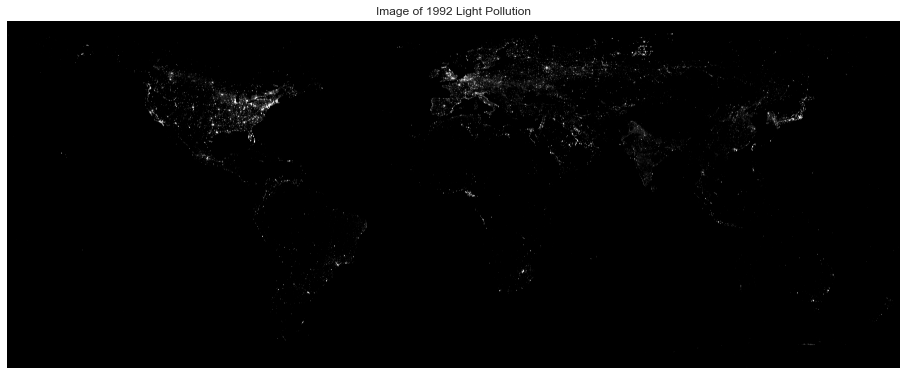

Image of 1992 Light Pollution - Retrieved from data/nightLight/Harmonized_DN_NTL_1992_calDMSP.tif with Shape (16801, 43201)

In [13]:
img = Image.read('data/nightLight/Harmonized_DN_NTL_1992_calDMSP.tif', "1992 Light Pollution")
img

In [16]:
gan_url = "https://www.globeatnight.org/"
files = [gan_url + i["href"] for i in BeautifulSoup(requests.get(gan_url+"maps.php").content, "lxml").findAll(href=re.compile("\.csv$"))]
!mkdir gan
gan = []
for file in files:
  print(file)
  filename = "gan/"+file.split("/")[-1]
  file = StringIO(requests.get(file, allow_redirects=True).content)
  data = pd.read_csv(file, error_bad_lines=False)[["Latitude", "Longitude", "Elevation(m)", "LocalDate", "LocalTime", "UTDate", "UTTime", "LimitingMag", "Country"]].to_csv(filename)
  gan.append(data)

gan[0]

A subdirectory or file gan already exists.


https://www.globeatnight.org/2020data/GaN2020.csv


KeyboardInterrupt: 

In [9]:
!curl https://hosted-datasets.gbif.org/ibol/ibol.zip > ibol.zip
!mkdir ibol/
!unzip ibol.zip -d ibol/
!rm ibol.zip

xml_data = html.parse('ibol/meta.xml').getroot().getchildren()[0].getchildren()[0].getchildren()
xml_data = xml_data[:1] + xml_data[3:]
ibol_meta = {}
for el in xml_data:
  el = html.document_fromstring(etree.tostring(el))
  ibol_meta[el.xpath("//files")[0].getchildren()[0].text] = [i.get("term").split("/")[-1] for i in el.xpath("//field")]

pprint(ibol_meta)

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 1228M  100 1228M    0     0  21.0M      0  0:00:58  0:00:58 --:--:-- 16.6M
Archive:  ibol.zip
  inflating: ibol/occurrences.txt    
  inflating: ibol/media.txt          
  inflating: ibol/sequence.txt       
  inflating: ibol/meta.xml           
  inflating: ibol/eml.xml            
{'media.txt': ['title',
               'identifier',
               'references',
               'format',
               'license',
               'type'],
 'occurrences.txt': ['occurrenceID',
                     'catalogNumber',
                     'fieldNumber',
                     'identificationRemarks',
                     'basisOfRecord',
                     'occurrenceRemarks',
                     'phylum',
                     'class',
                     'order',
                     'family',
                     'genus',
        

In [10]:
!cat ibol/occurrences.txt | head -n 10
ibol_occ = pd.read_csv("ibol/occurrences.txt", delimiter="\t", names=ibol_meta["occurrences.txt"])
ibol_occ

AAASF001-17	http://bins.boldsystems.org/index.php/Public_RecordView?processid=AAASF001-17		CBGSFMX-0101	BOLD:ADP3520	MATERIAL_SAMPLE	Universidad Autonoma de Nuevo Leon	Arthropoda	Insecta	Diptera	Psychodidae	Lutzomyia	BOLD:ADP3520	Jorge J. Rodriguez Rojas										2016-10-28	Wilbert P	Mexico	Quintana Roo	Candelaria	19.3786	-88.1892							Slide mounted with Euparal	Adult	M		Barcode of Life Datasystems	Creative Commons - Share Alike	en	http://www.boldsystems.org/index.php/Public_BarcodeCluster?clusteruri=BOLD:ADP3520	http://www.boldsystems.org/index.php/Public_BarcodeCluster?clusteruri=BOLD:ADP3520	https://www.ncbi.nlm.nih.gov/nuccore/MK851247
AAASF002-17	http://bins.boldsystems.org/index.php/Public_RecordView?processid=AAASF002-17		CBGSFMX-0201		MATERIAL_SAMPLE	Universidad Autonoma de Nuevo Leon	Arthropoda	Insecta	Diptera	Psychodidae	Dampfomyia	Dampfomyia deleoni	Jorge J. Rodriguez Rojas										2016-10-26	JMM and W. Perez	Mexico	Quintana Roo	Candelaria	19.7364	-88.9565							Slide moun

,occurrenceID,catalogNumber,fieldNumber,identificationRemarks,basisOfRecord,occurrenceRemarks,phylum,class,order,family,genus,scientificName,identifiedBy,associatedOccurrences,associatedTaxa,collectionCode,eventID,locationRemarks,eventTime,habitat,samplingProtocol,locationID,eventDate,recordedBy,country,stateProvince,locality,decimalLatitude,decimalLongitude,coordinatePrecision,georeferenceSources,maximumDepthInMeters,minimumDepthInMeters,maximumElevationInMeters,minimumElevationInMeters,eventRemarks,lifestage,sex,preparations,rightsHolder,rights,language,taxonConceptID,taxonID,associatedSequences
AAASF001-17,http://bins.boldsystems.org/index.php/Public_R...,NaN,CBGSFMX-0101,BOLD:ADP3520,MATERIAL_SAMPLE,Universidad Autonoma de Nuevo Leon,Arthropoda,Insecta,Diptera,Psychodidae,Lutzomyia,BOLD:ADP3520,Jorge J. Rodriguez Rojas,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2016-10-28,Wilbert P,Mexico,Quintana Roo,Candelaria,19.3786,-88.1892,NaN,NaN,NaN,NaN,NaN,NaN,Slide mounted with Euparal,Adult,M,NaN,Barcode of Life Datasystems,Creative Commons - Share Alike,en,http://www.boldsystems.org/index.php/Public_Ba...,http://www.boldsystems.org/index.php/Public_Ba...,https://www.ncbi.nlm.nih.gov/nuccore/MK851247
AAASF002-17,http://bins.boldsystems.org/index.php/Public_R...,NaN,CBGSFMX-0201,NaN,MATERIAL_SAMPLE,Universidad Autonoma de Nuevo Leon,Arthropoda,Insecta,Diptera,Psychodidae,Dampfomyia,Dampfomyia deleoni,Jorge J. Rodriguez Rojas,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2016-10-26,JMM and W. Perez,Mexico,Quintana Roo,Candelaria,19.7364,-88.9565,NaN,NaN,NaN,NaN,NaN,NaN,Slide mounted with Euparal,Adult,F,NaN,Barcode of Life Datasystems,Creative Commons - Share Alike,en,NaN,NaN,NaN
AAASF003-17,http://bins.boldsystems.org/index.php/Public_R...,NaN,CBGSFMX-0202,NaN,MATERIAL_SAMPLE,Universidad Autonoma de Nuevo Leon,Arthropoda,Insecta,Diptera,Psychodidae,Dampfomyia,Dampfomyia deleoni,Jorge J. Rodriguez Rojas,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2016-10-26,JMM and W. Perez,Mexico,Quintana Roo,Candelaria,19.7364,-88.9565,NaN,NaN,NaN,NaN,NaN,NaN,Slide mounted with Euparal,Adult,F,NaN,Barcode of Life Datasystems,Creative Commons - Share Alike,en,NaN,NaN,NaN
AAASF004-17,http://bins.boldsystems.org/index.php/Public_R...,NaN,CBGSFMX-0301,BOLD:AAY5017,MATERIAL_SAMPLE,Universidad Autonoma de Nuevo Leon,Arthropoda,Insecta,Diptera,Psychodidae,Lutzomyia,BOLD:AAY5017,Jorge J. Rodriguez Rojas,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2016-10-20,E. Lugo,Mexico,Quintana Roo,Huayun,19.5855,-88.5843,NaN,NaN,NaN,NaN,NaN,NaN,Slide mounted with Euparal,Adult,M,NaN,Barcode of Life Datasystems,Creative Commons - Share Alike,en,http://www.boldsystems.org/index.php/Public_Ba...,http://www.boldsystems.org/index.php/Public_Ba...,https://www.ncbi.nlm.nih.gov/nuccore/MK851267
AAASF005-17,http://bins.boldsystems.org/index.php/Public_R...,NaN,CBGSFMX-0302,BOLD:AAY5017,MATERIAL_SAMPLE,Universidad Autonoma de Nuevo Leon,Arthropoda,Insecta,Diptera,Psychodidae,Lutzomyia,BOLD:AAY5017,Jorge J. Rodriguez Rojas,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2016-10-20,E. Lugo,Mexico,Quintana Roo,Huayun,19.5855,-88.5843,NaN,NaN,NaN,NaN,NaN,NaN,Slide mounted with Euparal,Adult,M,NaN,Barcode of Life Datasystems,Creative Commons - Share Alike,en,http://www.boldsystems.org/index.php/Public_Ba...,http://www.boldsystems.org/index.php/Public_Ba...,https://www.ncbi.nlm.nih.gov/nuccore/MK851266
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZYPAN979-10,http://bins.boldsystems.org/index.php/Public_R...,CNCLEP00075359,NaN,NaN,MATERIAL_SAMPLE,"Canadian National Collection of Insects, Arach...",Arthropoda,Insecta,Lepidoptera,Crambidae,Achyra,Achyra bifidalis,Eugene G. Munroe,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1969-08-02,D. Kritsch,Mexico,Chiapas,Tuxtla Gutierrez,16.75,-93.1167,NaN,NaN,NaN,NaN,NaN,NaN,NaN,A,F,NaN,Barcode of Life Datasystems,Creative Commons - Share Alike,en,NaN,NaN,https

In [11]:
!cat ibol/media.txt | head -n 10
ibol_media = pd.read_csv("ibol/media.txt", delimiter="\t", names=ibol_meta["media.txt"])
ibol_media

POBW004-20	POBW004-20 Anterior	http://www.boldsystems.org/pics/POBW/kinzig_5_11072018+1581958401.jpg	http://bins.boldsystems.org/index.php/Public_RecordView?processid=POBW004-20	image/jpeg	CreativeCommons - Attribution Share-Alike
POBW004-20	POBW004-20 Lateral	http://www.boldsystems.org/pics/POBW/kinzig_6_11072018+1581958350.jpg	http://bins.boldsystems.org/index.php/Public_RecordView?processid=POBW004-20	image/jpeg	CreativeCommons - Attribution Share-Alike
POBW004-20	POBW004-20 Anterior	http://www.boldsystems.org/pics/POBW/180815_ind3-1_Plaevis_Dobel_200x+1581958627.jpg	http://bins.boldsystems.org/index.php/Public_RecordView?processid=POBW004-20	image/jpeg	CreativeCommons - Attribution Share-Alike
POBW004-20	POBW004-20 Anterior	http://www.boldsystems.org/pics/POBW/kinzig_5_11072018+1581958401.jpg	http://bins.boldsystems.org/index.php/Public_RecordView?processid=POBW004-20	image/jpeg	CreativeCommons - Attribution Share-Alike
POBW004-20	POBW004-20 Lateral	http://www.boldsystems.org/pics/

,title,identifier,references,format,license,type
0,POBW004-20,POBW004-20 Anterior,http://www.boldsystems.org/pics/POBW/kinzig_5_...,http://bins.boldsystems.org/index.php/Public_R...,image/jpeg,CreativeCommons - Attribution Share-Alike
1,POBW004-20,POBW004-20 Lateral,http://www.boldsystems.org/pics/POBW/kinzig_6_...,http://bins.boldsystems.org/index.php/Public_R...,image/jpeg,CreativeCommons - Attribution Share-Alike
2,POBW004-20,POBW004-20 Anterior,http://www.boldsystems.org/pics/POBW/180815_in...,http://bins.boldsystems.org/index.php/Public_R...,image/jpeg,CreativeCommons - Attribution Share-Alike
3,POBW004-20,POBW004-20 Anterior,http://www.boldsystems.org/pics/POBW/kinzig_5_...,http://bins.boldsystems.org/index.php/Public_R...,image/jpeg,CreativeCommons - Attribution Share-Alike
4,POBW004-20,POBW004-20 Lateral,http://www.boldsystems.org/pics/POBW/kinzig_6_...,http://bins.boldsystems.org/index.php/Public_R...,image/jpeg,CreativeCommons - Attribution Share-Alike
...,...,...,...,...,...,...
1727986,MSTAR595-12,MSTAR595-12 Lateral,http://www.boldsystems.org/pics/MSTAR/PLUS1778...,http://bins.boldsystems.org/index.php/Public_R...,image/jpeg,CreativeCommons - Attribution Non-Commercial S...
1727987,MSTAR677-12,MSTAR677-12 Lateral,http://www.boldsystems.org/pics/MSTAR/PLUS2195...,http://bins.boldsystems.org/index.php/Public_R...,image/jpeg,CreativeCommons - Attribution Non-Commercial S...
1727988,MSTAR689-12,MSTAR689-12 Lateral,http://www.boldsystems.org/pics/MSTAR/PLUS2232...,http://bins.boldsystems.org/index.php/Public_R...,image/jpeg,CreativeCommons - Attribution Non-Commercial S...
1727989,MSTAR729-12,MSTAR729-12 Lateral,http://www.boldsystems.org/pics/MSTAR/PLUS0172...,http://bins.boldsystems.org/index.php/Public_R...,image/jpeg,CreativeCommons - Attribution Non-Commercial S...


In [ ]:
!cat ibol/sequence.txt | head -n 10
ibol_seq = pd.read_csv("ibol/sequence.txt", delimiter="\t", names=ibol_meta["sequence.txt"])
ibol_seq

ACANT005-18	COI-5P	TTTGATGTATGTTTTGGTTGGTGTGTGAGGGGGGCTAATGGGGTTTTCTATAAGGTTATTAATTCGATTAGAGTTGGGGAGAGGAGGGGTTTGGATAGGGAGGGAGGCTGTGTATAATGTGTTAGTAACTAGACACGCTGTTATAATGGTCTTTTTTCTAGTAATACCGGTATTTATGGGGGGATTCGGTAATTGGCTCATGCCAGTGATGTTGGGGTTAAGGGATATGGCCCTTCCCCGATTGAACAATTTAAGGCTTATCCTGCTTCTCGCTAGGCTGGGTATTATAGGAGTATCTTTGCTTTTAGGAGGGGGTGGTGCTGGTTGGACAATATACCCCCCACTGATGTTAGGGGACTATAGGTCTGGTGTAGCTGTTGATCTAATGATCCTGAGGTTGCATGTAGTAGGTCTTTCTTCTATTCTAGGCTCAATCAATATCCTGATTACCTGGGTAGCTGGAAGAAGGGTAGTGTATAGAGTAGAACAGGCGCCACTGTTCGTATGGGCTTTAGTAACGACGGCTGGTCTAGTAGTTTTAACGGTCCCAGTCTTGGCGGCAGCCTTGACCATACTTTTAATGGATCGTAATTTGAATTCCAGGTTTTTTGACCCTTGTGGGGGAGGTTCACCCATTTTGTATCAGCACTTATTCTGATTT
GBMAA467-14	COI-5P	ATGTATGTTTTGGTTGGTGTGTGAGGGGGGCTAATGGGGTTTTCTATAAGACTATTAATTCGATTAGAATTAGGGAGAGGAGGGGTTTGGATGGGAAGAGAGGCTGTGTATAATGTTTTAGTAACCAGACACGCTGTTATAATGGTATTTTTTCTAGTAATACCAGTATTTATGGGAGGATTCGGTAATTGACTCATGCCAGTGATGTTAGGGTTGAGGGATATAGCCCTTCCCCGGCTGAACAATTTGAGGCTTATCTTACTTCTCGCTAGGTTGGGGGTTATAGGTGTGTCCTTGCTT

In [ ]:
dmsp_ols_url = "https://ngdc.noaa.gov"
dmsp_ols = requests.get(dmsp_ols_url+"/eog/dmsp/downloadV4composites.html").content
files = [dmsp_ols_url + i["href"].replace("\n", "") for i in BeautifulSoup(dmsp_ols, "lxml").find_all("table", class_="list")[0].find_all("a")]
!rm -r dmsp
!mkdir dmsp_tar dmsp_tif dmsp
for file in files:
  print(file)
  filename = "dmsp_tar/"+file.split("/")[-1]
  r = requests.get(file, allow_redirects=True)
  with open(filename, 'wb') as fileobj: fileobj.write(r.content)

!for f in dmsp_tar/*.tar; do tar xf "$f" -C dmsp_tif/; done
!rm dmsp_tar/*.tar
!gunzip -r dmsp_tif
!rm dmsp/*.gz
output.clear()

GBIF.org (11 September 2021) GBIF Occurrence Download  https://doi.org/10.15468/dl.vkf37t